In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Download dos dados

In [2]:
stock = 'EURUSD=X'
start_date = '2004-01-01'
end_date = '2022-01-01'

In [3]:
df = pd.DataFrame(yf.download(stock, start_date, end_date)['Close'])

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

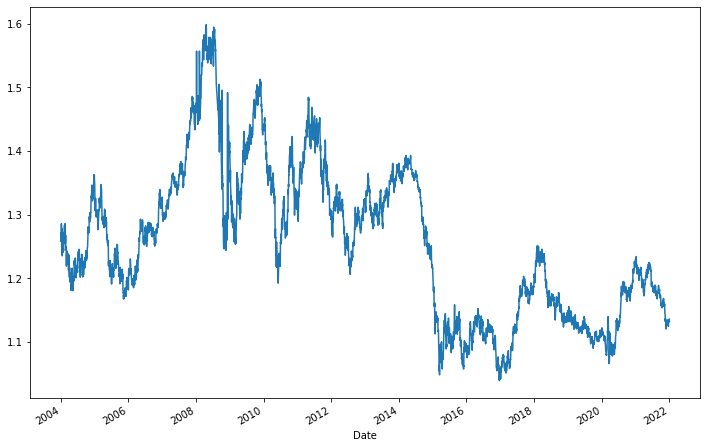

In [4]:
df.Close.plot(figsize = (12, 8))

## Calculando os retornos normalizados

In [5]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1)) # normalizing returns
df.dropna(inplace=True)

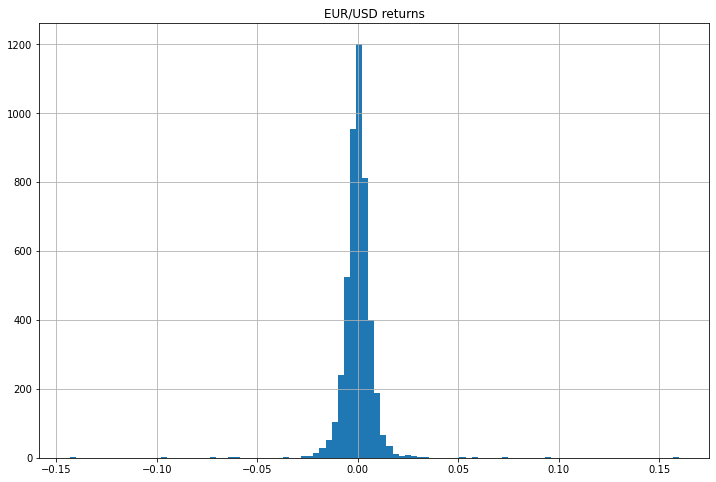

In [6]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

## Estratégica de comprar o ativo e mantê-lo por anos - "Buy and Hold"

In [7]:
df['returns'].sum() # retorno acumulado - perdemos 10.5%

-0.1052472896493486

In [8]:
np.exp(df.returns.sum()) # do valor que investimos, no final ficamos com 90% desse valor

0.9001019091769057

In [9]:
df.Close[-1] / df.Close[0] # outra forma de calcular o retorno normalizado

0.9001019091769044

In [10]:
df.returns.cumsum() # soma acumulada dos retornos

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2021-12-27   -0.105315
2021-12-28   -0.104805
2021-12-29   -0.106153
2021-12-30   -0.102151
2021-12-31   -0.105247
Name: returns, Length: 4667, dtype: float64

In [11]:
df['creturns'] = df.returns.cumsum().apply(np.exp) # retorno acumulado
df['creturns']

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2021-12-27    0.900041
2021-12-28    0.900500
2021-12-29    0.899287
2021-12-30    0.902893
2021-12-31    0.900102
Name: creturns, Length: 4667, dtype: float64

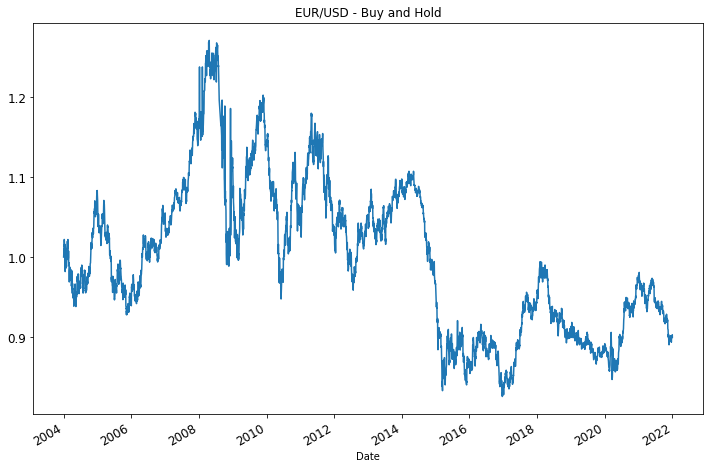

In [12]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show() 

In [13]:
df.creturns.iloc[-1] # performance absoluta do retorno acumulado - finalizamos com 90% do valor investido

0.9001019091769058

In [14]:
df.returns.sum() # performance absoluta do somatório do retorno - perdemos 10,5% do valor investido

-0.1052472896493486

In [15]:
df

,Close,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2021-12-27,1.132426,-0.000272,0.900041
2021-12-28,1.133003,0.000510,0.900500
2021-12-29,1.131478,-0.001347,0.899287


**risco e retorno anualizado**

In [16]:
df.returns.mean() * 252 # mean return

-0.00568294771622795

In [17]:
df.returns.std() * np.sqrt(252) # risk

0.11660137638888463

**máximo declínio**

In [18]:
df['cummax'] = df.creturns.cummax()
df

,Close,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2021-12-27,1.132426,-0.000272,0.900041,1.270709
2021-12-28,1.133003,0.000510,0.900500,1.270709
2021-12-29,1.131478,-0.001347,0.899287,1.270709


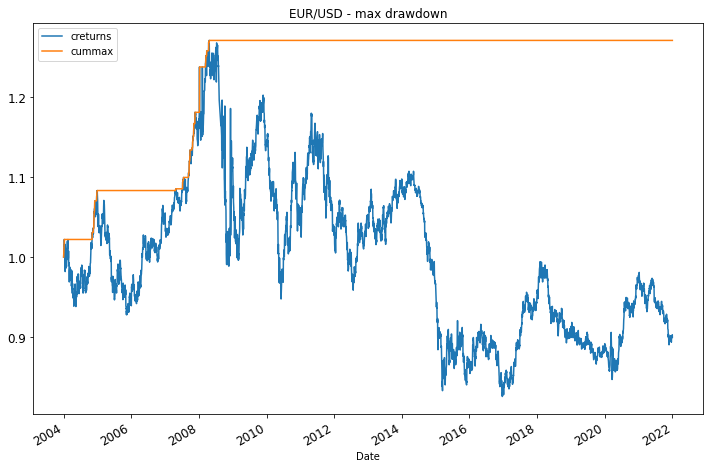

In [19]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [20]:
drawdown = df['cummax'] - df['creturns']

In [21]:
drawdown.max() # pior cenário

0.4448840569933433

In [22]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Estratégia de cruzamento utilizando o indicador de média móvel simples - Simple Moving Average (SMA)

In [23]:
data = pd.DataFrame(df.Close)

In [24]:
sma_s = 47 # short moving average
sma_l = 136 # long moving average

In [25]:
data['SMA_S'] = data.Close.rolling(sma_s).mean()
data['SMA_L'] = data.Close.rolling(sma_l).mean()
data

,Close,SMA_S,SMA_L
Date,,,
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
2004-01-08,1.277498,NaN,NaN
...,...,...,...
2021-12-27,1.132426,1.139734,1.164051
2021-12-28,1.133003,1.139106,1.163651
2021-12-29,1.131478,1.138413,1.163212


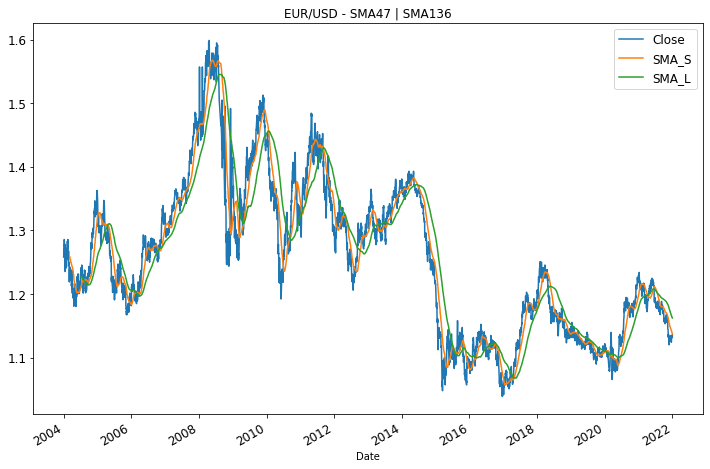

In [26]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [27]:
data.dropna(inplace=True) # remover os dados faltantes (devido à estratégia de média móvel)
data

,Close,SMA_S,SMA_L
Date,,,
2004-07-09,1.241897,1.212090,1.227669
2004-07-12,1.240803,1.212794,1.227541
2004-07-13,1.233304,1.213758,1.227280
2004-07-14,1.238497,1.214905,1.227033
2004-07-15,1.235605,1.215914,1.226824
...,...,...,...
2021-12-27,1.132426,1.139734,1.164051
2021-12-28,1.133003,1.139106,1.163651
2021-12-29,1.131478,1.138413,1.163212


In [28]:
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
# if short MA is > than long MA -> buy or long position
# if long MA is > than short MA -> sell or short position

In [29]:
data

,Close,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212090,1.227669,-1
2004-07-12,1.240803,1.212794,1.227541,-1
2004-07-13,1.233304,1.213758,1.227280,-1
2004-07-14,1.238497,1.214905,1.227033,-1
2004-07-15,1.235605,1.215914,1.226824,-1
...,...,...,...,...
2021-12-27,1.132426,1.139734,1.164051,-1
2021-12-28,1.133003,1.139106,1.163651,-1
2021-12-29,1.131478,1.138413,1.163212,-1


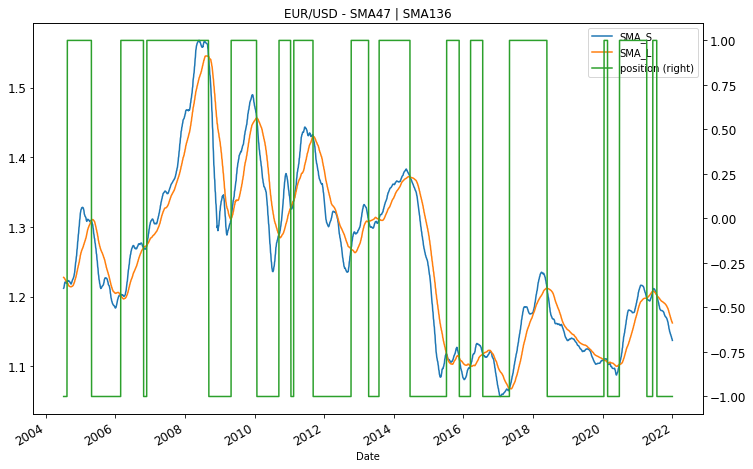

In [30]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Backtesting na estratégia

In [31]:
data

,Close,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212090,1.227669,-1
2004-07-12,1.240803,1.212794,1.227541,-1
2004-07-13,1.233304,1.213758,1.227280,-1
2004-07-14,1.238497,1.214905,1.227033,-1
2004-07-15,1.235605,1.215914,1.226824,-1
...,...,...,...,...
2021-12-27,1.132426,1.139734,1.164051,-1
2021-12-28,1.133003,1.139106,1.163651,-1
2021-12-29,1.131478,1.138413,1.163212,-1


In [32]:
data['returns'] = np.log(data['Close'] / data['Close'].shift(1)) # cálculo dos retornos
data

,Close,SMA_S,SMA_L,position,returns
Date,,,,,
2004-07-09,1.241897,1.212090,1.227669,-1,NaN
2004-07-12,1.240803,1.212794,1.227541,-1,-0.000881
2004-07-13,1.233304,1.213758,1.227280,-1,-0.006062
2004-07-14,1.238497,1.214905,1.227033,-1,0.004202
2004-07-15,1.235605,1.215914,1.226824,-1,-0.002338
...,...,...,...,...,...
2021-12-27,1.132426,1.139734,1.164051,-1,-0.000272
2021-12-28,1.133003,1.139106,1.163651,-1,0.000510
2021-12-29,1.131478,1.138413,1.163212,-1,-0.001347


In [33]:
data['strategy'] = data['position'].shift(1) * data['returns'] # retorno de hoje multiplicado pelo sinal de ontem
data

,Close,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-07-09,1.241897,1.212090,1.227669,-1,NaN,NaN
2004-07-12,1.240803,1.212794,1.227541,-1,-0.000881,0.000881
2004-07-13,1.233304,1.213758,1.227280,-1,-0.006062,0.006062
2004-07-14,1.238497,1.214905,1.227033,-1,0.004202,-0.004202
2004-07-15,1.235605,1.215914,1.226824,-1,-0.002338,0.002338
...,...,...,...,...,...,...
2021-12-27,1.132426,1.139734,1.164051,-1,-0.000272,0.000272
2021-12-28,1.133003,1.139106,1.163651,-1,0.000510,-0.000510
2021-12-29,1.131478,1.138413,1.163212,-1,-0.001347,0.001347


In [34]:
data.dropna(inplace=True) # removendo os valores faltantes

In [35]:
data[['returns', 'strategy']].sum() # performance absoluta - perdemos 9% na estratégia buy and hold, mas ganhamos 95% na estratégia do SMA

returns    -0.09221
strategy    0.95693
dtype: float64

In [36]:
data[['returns', 'strategy']].sum().apply(np.exp) # performance absoluta
# se tivessemos investido um dólar, o resultado seria 0.91 dólar para buy and hold e 2.6 dólares para o SMA

returns     0.911914
strategy    2.603690
dtype: float64

In [37]:
data[['returns', 'strategy']].mean() * 252

returns    -0.005128
strategy    0.053221
dtype: float64

In [38]:
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.116365
strategy    0.116317
dtype: float64

In [39]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data

,Close,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-12,1.240803,1.212794,1.227541,-1,-0.000881,0.000881,0.999119,1.000882
2004-07-13,1.233304,1.213758,1.227280,-1,-0.006062,0.006062,0.993081,1.006967
2004-07-14,1.238497,1.214905,1.227033,-1,0.004202,-0.004202,0.997263,1.002745
2004-07-15,1.235605,1.215914,1.226824,-1,-0.002338,0.002338,0.994934,1.005092
2004-07-16,1.245594,1.217086,1.226589,-1,0.008051,-0.008051,1.002977,0.997032
...,...,...,...,...,...,...,...,...
2021-12-27,1.132426,1.139734,1.164051,-1,-0.000272,0.000272,0.911852,2.603867
2021-12-28,1.133003,1.139106,1.163651,-1,0.000510,-0.000510,0.912317,2.602540
2021-12-29,1.131478,1.138413,1.163212,-1,-0.001347,0.001347,0.911088,2.606049


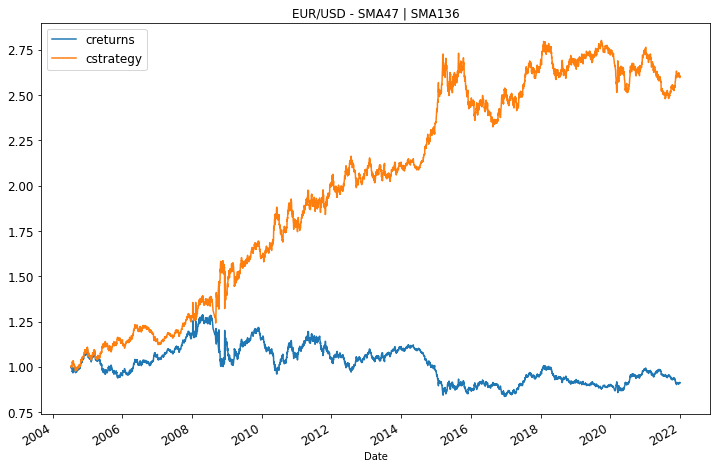

In [40]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [41]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf # o quanto a estratégia SMA superou a buy and hold

1.6917761898577481

## Encontrar a melhor estratégia de SMA

In [42]:
df = pd.DataFrame(data['Close'])

In [43]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.Close / data.Close.shift(1))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    return np.exp(data["strategy"].sum())

In [44]:
test_strategy((50, 200))

1.3272239113372828

In [45]:
test_strategy((75, 150))

1.7301639961660968

In [46]:
test_strategy((25, 252))

1.3505127372223376

In [47]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [48]:
from itertools import product

SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

combinations = list(product(SMA_S_range, SMA_L_range))

print('{} combinações possíveis'.format(len(combinations)))
list(product(SMA_S_range, SMA_L_range)) # criar todas combinações possíveis

6080 combinações possíveis


[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [49]:
# criar uma lista com os resultados através das estratégias
results = []
for comb in combinations:
    results.append(test_strategy(comb))
    
results

[1.0044823642982637,
 0.9846295211678947,
 0.9829352710277173,
 1.0059056968865097,
 1.057876583851937,
 1.0557913510023125,
 1.0879906267583022,
 1.1350061653924737,
 1.1188643067682975,
 1.227533744123843,
 1.243807376840245,
 1.1890708065142281,
 1.2462336221293473,
 1.2438227245101101,
 1.1422209172590556,
 1.1888520336047947,
 1.2653195703826214,
 1.2700468014940605,
 1.2839367326033873,
 1.3265355533011962,
 1.368303981733483,
 1.284066731211579,
 1.3275705202373143,
 1.276721594731541,
 1.2937543194992411,
 1.2671311950951825,
 1.3254496338247155,
 1.4128123936137755,
 1.454204303430312,
 1.4272388991208327,
 1.4444007094661728,
 1.4468866943559566,
 1.4519568449294171,
 1.470627221576108,
 1.5358964954831693,
 1.491907965023897,
 1.5367314369901528,
 1.5493037678326973,
 1.5510669430244457,
 1.458183077382856,
 1.4494005931444722,
 1.49702655319136,
 1.439358877208099,
 1.4140889758628954,
 1.3372270260716992,
 1.3149000032441087,
 1.3368008980735677,
 1.3766040400050739,
 1.37

In [50]:
np.max(results) # resultado da melhor combinação

2.462073255749684

In [51]:
np.argmax(results) # posição de melhor combinação

5509

In [52]:
combinations[np.argmax(results)] # melhor combinação

(46, 137)

In [53]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results["performance"] = results
many_results

,SMA_S,SMA_L,performance
0,10,100,1.004482
1,10,101,0.984630
2,10,102,0.982935
3,10,103,1.005906
4,10,104,1.057877
...,...,...,...
6075,49,247,1.524911
6076,49,248,1.539603
6077,49,249,1.527052
6078,49,250,1.520360


In [54]:
many_results.nlargest(10, "performance") # melhores 10 estratégias

,SMA_S,SMA_L,performance
5509,46,137,2.462073
5660,47,136,2.459940
5356,45,136,2.428735
5811,48,135,2.397323
5963,49,135,2.396213
5507,46,135,2.388499
5661,47,137,2.380671
5508,46,136,2.362161
5204,44,136,2.361867
5812,48,136,2.359490


In [55]:
many_results.nsmallest(10, "performance") # piores 10 estratégias

,SMA_S,SMA_L,performance
310,12,106,0.904778
309,12,105,0.916492
308,12,104,0.918831
608,14,100,0.928804
461,13,105,0.929921
159,11,107,0.930107
611,14,103,0.938475
307,12,103,0.938996
610,14,102,0.941673
609,14,101,0.943643
